# Herramientas para el análisis de imágenes

Laboratorio 1 - Cátedra Pablo Cobelli

Primer cuatrimestre de 2023

----

In [45]:
# lo de siempre
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# nuevo paquete para tratar con imagenes
import skimage as ski

## Cargamos una imagen

In [46]:
imagen = ski.io.imread('https://upload.wikimedia.org/wikipedia/commons/3/3b/Blackgum_Tree_Leaf.jpg')

## Veamos como se vé la imagen que cargamos

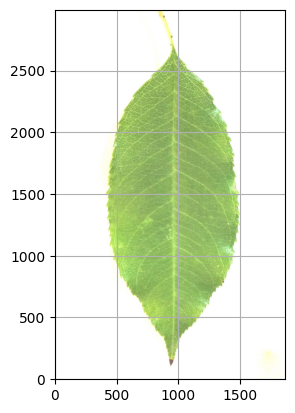

In [47]:
plt.figure()
plt.imshow(imagen, origin='lower')
plt.grid(True)

## Veamos un zoom sobre una region de interes, para ver que nivel de detalle tiene la imagen

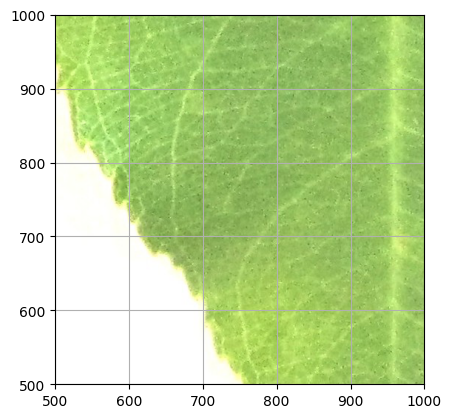

In [48]:
plt.figure()
plt.imshow(imagen, origin='lower')
plt.xlim(500, 1000)
plt.ylim(500, 1000)
plt.grid(True)

## Mehr licht!

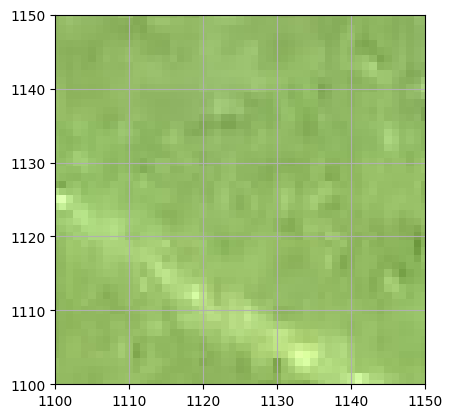

In [49]:
plt.figure()
plt.imshow(imagen, origin='lower')
plt.xlim(500+600, 500+600+50)
plt.ylim(500+600, 500+600+50)
plt.grid(True)

Todas juntas:

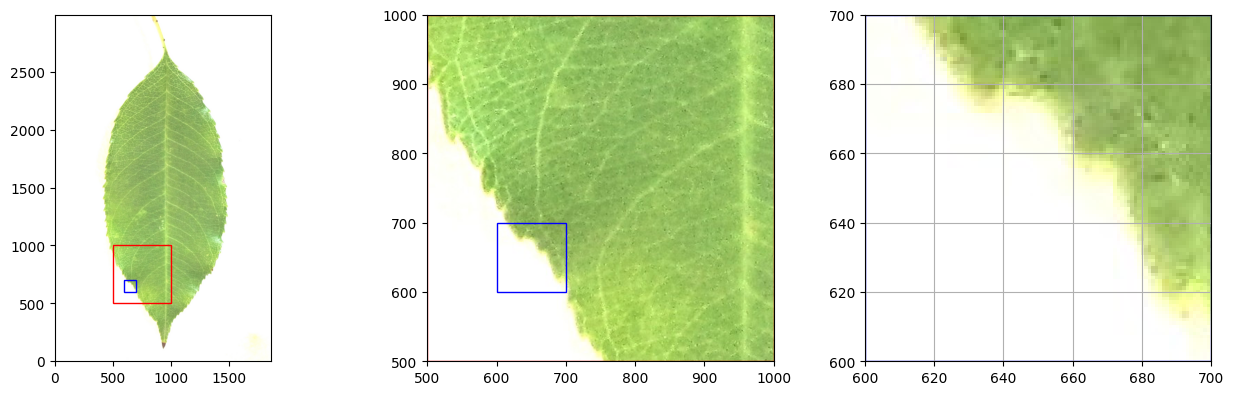

In [50]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(1, 3, figsize=(16, 4.5))

ax[0].imshow(imagen, origin='lower')
ax[0].add_patch(Rectangle((500,500), 500, 500, fill = False, edgecolor='red'))
ax[0].add_patch(Rectangle((600,600), 100, 100, fill = False, edgecolor='blue'))

ax[1].imshow(imagen, origin='lower')
ax[1].set_xlim(500, 1000)
ax[1].set_ylim(500, 1000)
ax[1].add_patch(Rectangle((600,600), 100, 100, fill = False, edgecolor='blue'))
ax[1].add_patch(Rectangle((500,500), 500, 500, fill = False, edgecolor='red'))

ax[2].imshow(imagen, origin='lower')
ax[2].grid(True)
ax[2].set_xlim(600, 700)
ax[2].set_ylim(600, 700)
ax[2].grid(True)
ax[2].add_patch(Rectangle((600,600), 100, 100, fill = False, edgecolor='blue'));

## Como es la representacion digital de una foto?

In [51]:
imagen.shape

(2994, 1866, 3)

In [52]:
np.min(imagen)

14

In [53]:
np.max(imagen)

255

In [54]:
2**8

256

Cuantos pixeles tiene la imagen en total?

In [55]:
2994*1866

5586804

In [56]:
imagen[600:700,600:700,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 254, 254, ..., 136, 137, 138],
       [255, 255, 255, ..., 137, 139, 138],
       [255, 255, 255, ..., 139, 139, 135]], dtype=uint8)

## Que pasa si vemos un solo canal?

In [57]:
imagenR = imagen[:,:,0]
imagenG = imagen[:,:,1]
imagenB = imagen[:,:,2]

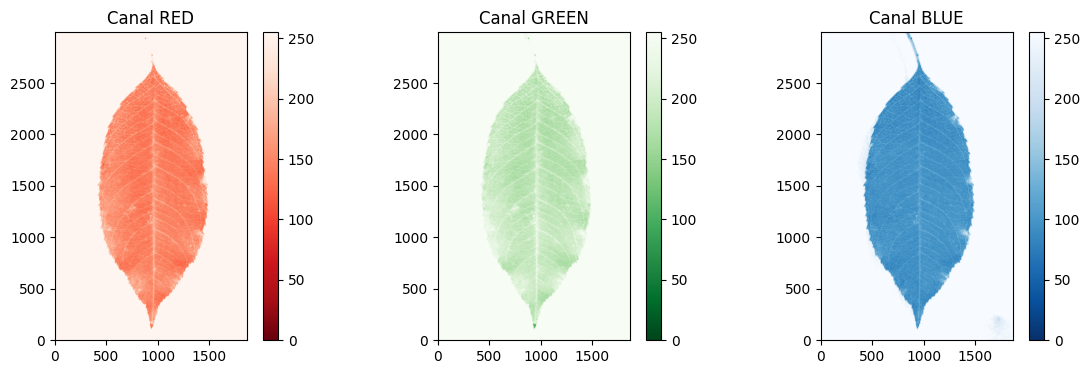

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))

imR = ax[0].imshow(imagenR, origin="lower", vmin=0, vmax=255, cmap="Reds_r")
plt.colorbar(imR, ax=ax[0]);
ax[0].title.set_text("Canal RED")

imG = ax[1].imshow(imagenG, origin="lower", vmin=0, vmax=255, cmap="Greens_r")
plt.colorbar(imG, ax=ax[1]);
ax[1].title.set_text("Canal GREEN")

imB = ax[2].imshow(imagenB, origin="lower", vmin=0, vmax=255, cmap="Blues_r")
plt.colorbar(imB, ax=ax[2]);
ax[2].title.set_text("Canal BLUE")


## Esto da una forma sencilla de calcular el area de la hoja en pixeles

Estrategia:

Tomo, por ejemplo, el canal BLUE y me fijo cuantos pixeles son 'suficientemente oscuros'. Asumamos que esa cuenta da $x$ (en pixeles)... cuanto mide entonces el area de la hoja en mm?

Tendre que encontrar la relacion pixeles a milimetros!

In [59]:
im = imagen[:,:,2]

y me quedo con aquellos pixeles que son suficientemente oscuros

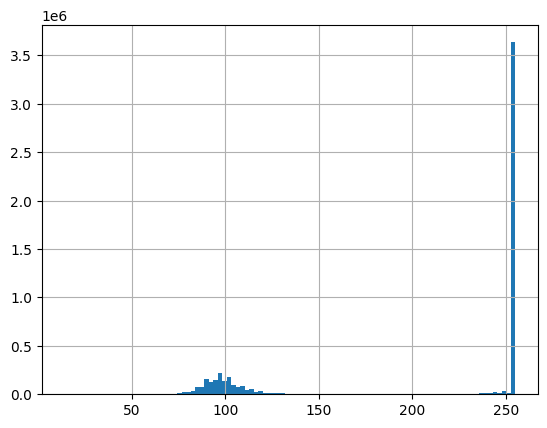

In [60]:
plt.figure()
plt.hist(im.flatten(), bins=100);
plt.grid(True)

## Breve desvio: como contar eventos

In [61]:
a = np.array([1, 2, 3, 4, 3, 2, 3, -1, 5, 4, 3, 7, 1, 0])

Como contamos cuantos valores dentro de 'a' son mayores a, digamos, 4?

In [62]:
a > 4

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False])

In [63]:
np.sum(a>=4)

4

## Volvemos a la imagen para "contar" su superficie

Entonces podemos saber cuantos pixeles en la imagen corresponden a la hoja! Basta con mirar el colorbar!

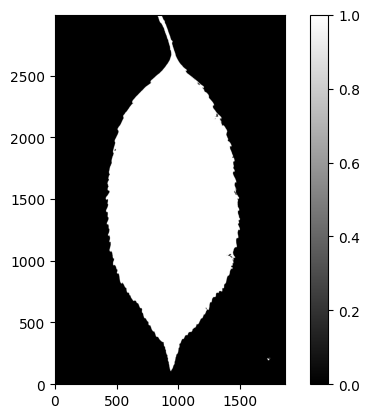

In [75]:
plt.figure()
plt.imshow(im<200, cmap='gray', origin='lower')
plt.colorbar()

In [65]:
np.sum(im<200)

1793188

## Funciones un poco mas avanzadas

In [76]:
imbw = im<100

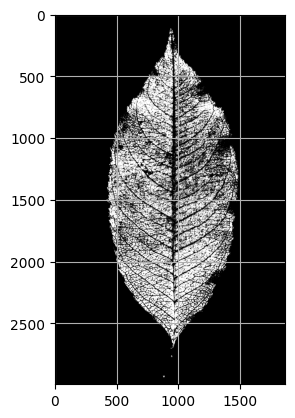

In [77]:
plt.figure()
plt.imshow(imbw, cmap='gray')
plt.grid(True)

In [68]:
L = ski.measure.label(imbw)

In [69]:
propiedades = ski.measure.regionprops(L)

In [70]:
propiedades[0].area

1792936

In [71]:
propiedades[0].perimeter

8899.895521115224

In [72]:
propiedades[0].axis_major_length

2239.7363800232183

In [73]:
propiedades[0].axis_minor_length

1034.1268462974142

In [74]:
propiedades[0].equivalent_diameter_area

1510.9060249993327

Donde ver que otras propiedades devuelve `regionprops`?

https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops